# Анализ оттока клиентов сети фитнес-центров

**Цель проекта** - проанализировать причины оттока клиентов сетти фитнес-центров и подготовить план действий по удержанию клиентов.

**Задачи проекта:**
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1. выделить целевые группы клиентов;
2. предложить меры по снижению оттока;
3. определить другие особенности взаимодействия с клиентами.

Мы имеем датасет gym_churn.csv, который содержит данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
<br>Данные клиента за предыдущий до проверки факта оттока месяц:
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

<br>Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* 'Churn' — факт оттока в текущем месяце.

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
import scipy.stats as stats
from scipy import stats as st
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
pd.set_option('display.max_colwidth', None)
plt.rcParams ['figure.figsize'] = [13, 8]

In [2]:
try:
    gym_churn = pd.read_csv('gym_churn.csv')
except:
    gym_churn = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
gym_churn.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [4]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

**Вывод:**
<br>Датафрейм gym_churn имеет 14 столбцов и 4000 строк без пропусков. Вес датафрейма 437.6 Кб. Столбец Month_to_end_contract необходмо привести к типу int64. Названия столбцов необходимо привести к стилю snake_case.      

## Предобработка данных

In [5]:
# Приведем столбец Month_to_end_contract к типу int64
gym_churn['Month_to_end_contract'] = gym_churn['Month_to_end_contract'].astype("int")

In [6]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   int64  
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [7]:
# Приведем названия столбцов к стилю snake_case
gym_churn.columns = map(str.lower, gym_churn.columns)

In [8]:
gym_churn.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


In [10]:
# Проверка таблицы на явные дубликаты
gym_churn.duplicated().sum()

0

**Вывод:**
В данных отсутствуют пропуски и явные дубликаты. В датафрейме столбцы были приведены к стилю snake_case. Столбец month_to_end_contract привели к типу int64.

## Исследовательский анализ данных

### Статистические данные

In [11]:
# Изучим средние значения и стандартные отклонения
gym_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


**Вывод**
<br>Данные равномерные, стандартные отклонения не очень далеки от средних значений.
* Пол представлен примерно поровну.
* Большая часть клиентов (85%) фитнес-центра живет рядом.
* Почти половина клиентов (48%) являются сотрудником компании-партнера фитнес-центра.
* 30% клиентов записались на первое занятие в рамках акции «приведи друга».
* Почти все клиенты оставили свой контактный телефон.
* Средний возраст клиентов - 29 лет. Максимальный - 41 год.
* Среднее время жизни клиента - 3.7 мес.
* Средний срок окончания действия текущего абонемента - 4.3 мес.
* 41% клиентов посещают групповые занятия.
* В среднем клиенты посещали фитнес-центр 1.8 раз в неделю за весь период.
* Средняя частота посещений за текущий месяц - 1.77 в неделю.
* Средняя суммарная выручка от других услуг фитнес-центра составляет 146.9 ед.
* Отток в текущем месяце составляет 26%.

In [12]:
# Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался
gym_churn.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


**Вывод:**
* Пол распределился равномерно, соответственно, этот признак не влияет на отток.
* Не попавшие в отток клиенты чуть чаще живут/работают рядом с фитнес-центром (86% и 77% соответственно). Можно сказать, что данный признак слабо влияет на отток.
* Только треть (35%) клиентов, попавших в отток, являются сотрудником компании-партнера клуба, среди оставшихся таких клиентов - 53%. Можно сказать, что данный признак влияет на отток. Среди сотрудников компании-партнера клуба отток ниже.
* 35% клиентов, не попавших в отток, пришли по программе "приведи друга", среди попавших в отток - 18%. Данный признак влияет на отток. Среди клиентов данной акции отток ниже.
* Телефон указывают одинаково часто, данный признак не влияет на отток.
* Средняя длительность текущего абонемента у клиентов, ушедших в отток, составляет 1.7 мес, у остальных - 5.7 мес. Данный признак влият на отток. Те, кто купили длительный абонемент, реже уходят в отток.
* Клиенты, попавшие в отток, реже посещают групповые занятия (46% и 26% сответственно). Данный признак влияет на отток.
* Средний возраст клиентов, попавших в отток - 27 лет, оставшихся - 30 лет. Данный признак не влияет на отток.
* Клиенты, не попавшие в отток, тратят больше денег на другие услуги фитнес-центра, чем ушедшие (158 и 115 ед. соответственно). Данный признак влият на отток.
* Средняя длительность текущего абонемента у клиентов, ушедших в отток, составляет 1.6 мес, у оставшихся - 5.3 мес. Данный признак влияет на отток. Клиенты реже уходят из фитнес-клуба, если их абонемент не закончен.
* Средний срок жизни оставшихся клиентов выше, чем у ушедшх в отток (4.7 мес. и 1 мес. соответственно). Данный признак влияет на отток. Клиенты реже ухоят из фитнес-клуба, если ходят туда несколько месяцев.
* Средняя частота посещений за весь период у клиентов, попавших в отток, ниже, чем у оставшихся (1.47 и 2 раза в неделю соответственно). Можно сказать, что данный признак незначительно влияет на отток.
* Средняя частота посещений за последний месяц у попавших в отток клиентов в 2 раза ниже, чем у оставшихся - 1 против 2 раз в неделю. Данный признак влияет на отток. Те, кто ушли, постепенно уменьшали количество походов в фитнес-клуб в неделю.

### Столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

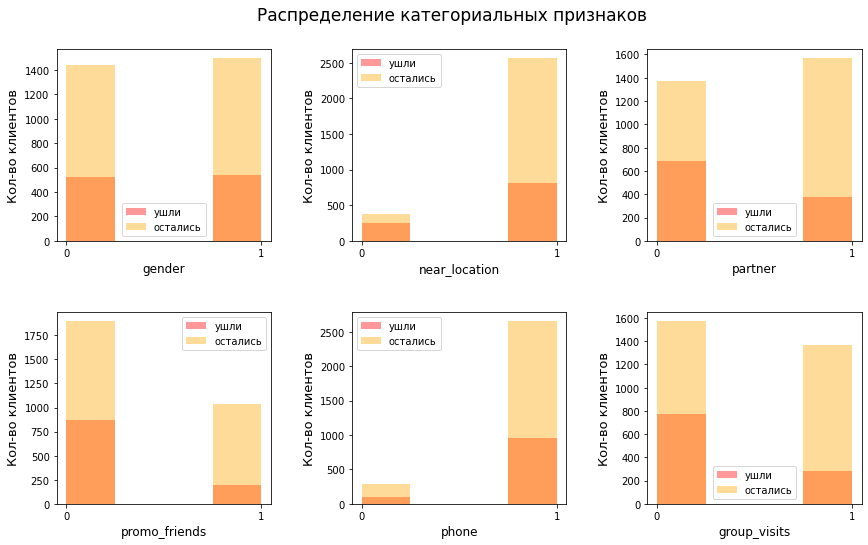

In [13]:
# Построим распределения категориальных признаков
categorical_features = gym_churn[['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']]
fig, axes = plt.subplots(nrows=2, ncols=3)
axes_list = [item for sublist in axes for item in sublist]
fig.tight_layout(pad=5.0)
fig.suptitle('Распределение категориальных признаков', fontsize=17)
for feature in categorical_features:
    ax = axes_list.pop(0)
    sns.distplot(gym_churn.query('churn == 1')[feature].astype(int), bins=4, ax=ax, kde=False, color='#FF0000',label='ушли')
    sns.distplot(gym_churn.query('churn == 0')[feature].astype(int), bins=4, ax=ax, kde=False, color='#FFA500',label='остались')
    ax.set_xticks([0,1])
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Кол-во клиентов', fontsize=13)
    ax.legend()

**Вывод**
* Пол распределен равномерно среди оставшихся клиентов и попавших в отток.
* Среди людей, живущих отдаленно от фитнес-центра, доля попавших в отток значительно выше, чем среди живущих неподалеку.
* Почти половина клиентов, не работающих компании-партнёра клуба, попали в отток. Доля ушедших клиентов, работающих в компании-партнера клуба, знаительно ниже.
* Клиенты, приходящие по акции "приведи друга", значительно реже попадают в отток, чем остальные.
* Наличие контактного телефона не влияет на попадание в отток.
* Клиенты, посещающие групповые занятия реже попадают в отток, чем те, кто их не посещает.

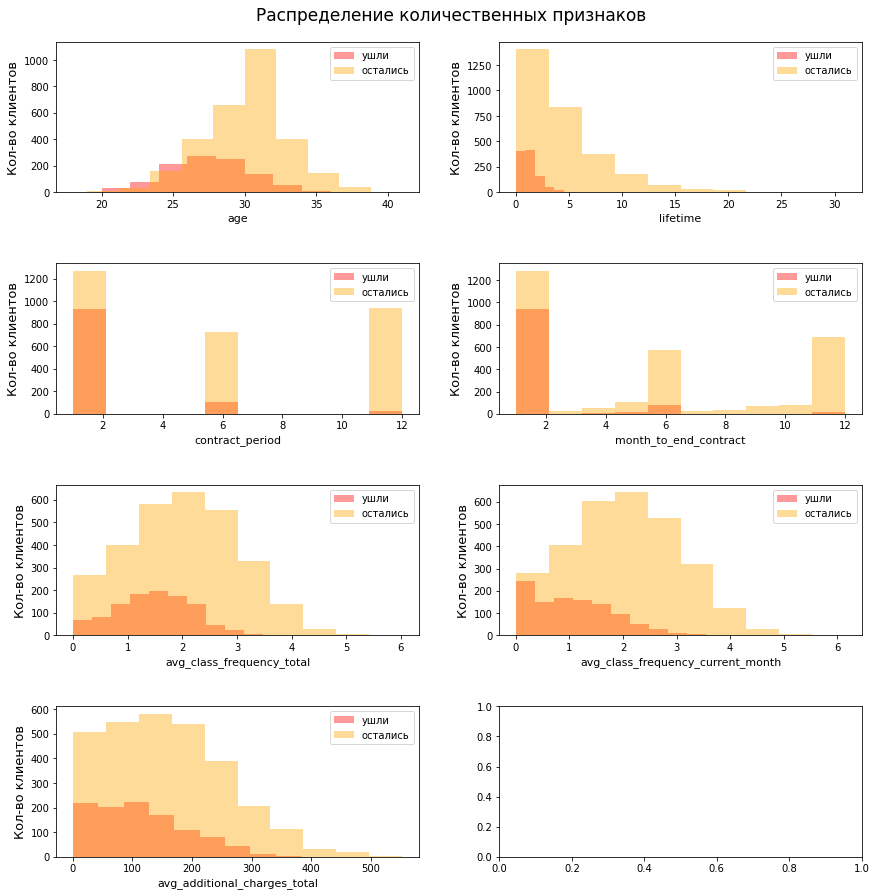

In [14]:
# Построим распределения количественных признаков
numeric_features = gym_churn[['age', 'lifetime', 'contract_period', 'month_to_end_contract', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'avg_additional_charges_total']]
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(13,13))
axes_list = [item for sublist in axes for item in sublist]
fig.tight_layout(pad=5.0)
fig.suptitle('Распределение количественных признаков', fontsize=17)
for feature in numeric_features:
    ax = axes_list.pop(0)
    sns.distplot(gym_churn.query('churn == 1')[feature], bins=10, ax=ax, kde=False, color='#FF0000',label='ушли')
    sns.distplot(gym_churn.query('churn == 0')[feature], bins=10, ax=ax, kde=False, color='#FFA500',label='остались')
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('Кол-во клиентов', fontsize=13)
    ax.legend()

**Вывод**
* Возраст распределен равномерно среди оставшихся и попавших в отток клиентов.
* Попадающие в отток клиенты чаще уходят после первого месяца. У клиентов с выскоим 'lifetime' оттока почти нет.
* Чаще уходят клиенты с длительностью абонемента 1 месяц. Чем дольше абонемент у клиентов, тем меньше доля оттока.
* Клиенты, которые ушли, ходили в среднем немного реже за все время, чем те, кто остался. Если клиент ходит 4 и более раз в неделю в фитнес-центр, то он скорее всего не уйдет.
* Последний перед оттоком месяц большинство ушедших клиентов не посещали клуб.

### Матрица корреляций признаков

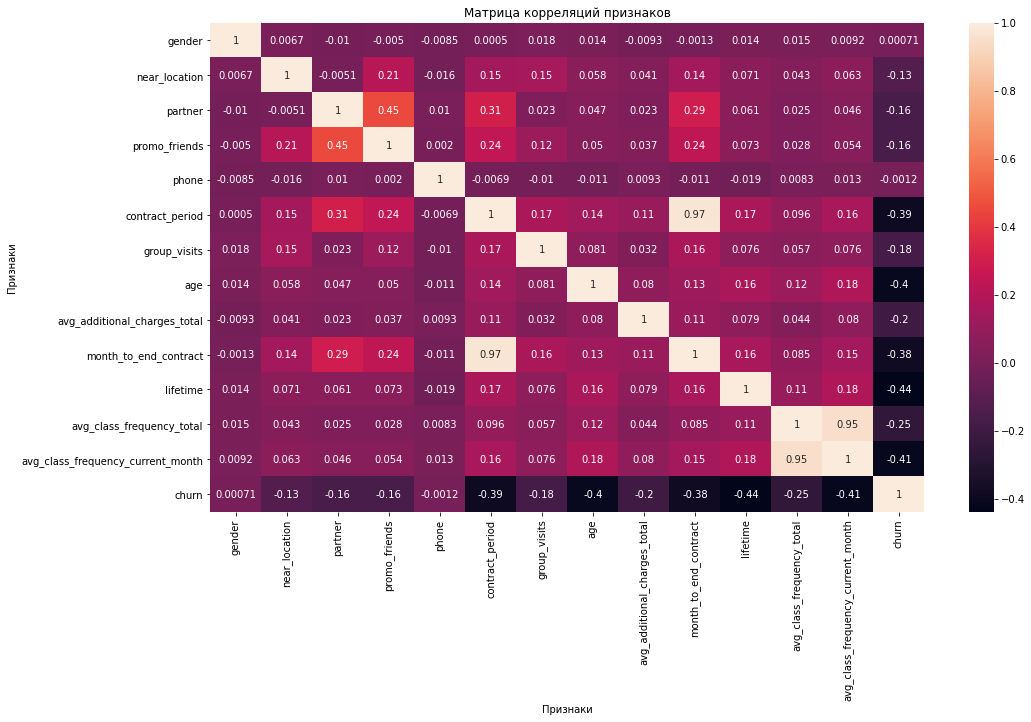

In [15]:
cm = gym_churn.corr()
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot = True, square=False)
plt.title('Матрица корреляций признаков')
plt.xlabel('Признаки') 
plt.ylabel('Признаки') 
plt.show()

**Вывод**
* Пол (gender) и телефон (phone) имеют практически нулевую корреляцию с оттоком.
* На целевую переменную оказывают умеренное влияние 'age', 'contract_period', 'lifetime' и 'avg_class_frequency_current_month'. Чем больше возраст, срок действия абонемента, время с момента первого посещения и среднее количество посещений в последний месяц, тем ниже отток.
* Остальные признаки практически не влияют на отток клиентов.
* Между собой сильно коррелируют две пары признаков:
<br>срок абонемента 'contract_period' и количество месяцев до конца абонемента 'month_to_end_contract'- чем больше срок абонемента, тем скорее всего больше месяцев осталось;
<br>средняя частота посещений за последний месяц'avg_class_frequency_current_month' и средняя частота посещений за весь период 'avg_class_frequency_total' - клиенты, которые давно ходят с определенным графиком, скорее всего и за последний месяц ходили с таким же графиком.

**Общий вывод по исследовательскому анализу данных**

**1. Демография и основные характеристики клиентов**
* Гендерный состав клиентов сбалансирован (примерно 50/50), и пол не влияет на отток.
* Средний возраст клиентов — **29 лет**, при этом возраст также не оказывает значимого влияния на отток.
* **85% клиентов** живут или работают рядом с фитнес-центром, что снижает вероятность их ухода.
* **48% клиентов** являются сотрудниками компаний-партнеров, что также уменьшает отток.
* **30% клиентов** пришли по акции «приведи друга», и у них отток значительно ниже.

**2. Факторы, влияющие на отток**
  
**Сильное влияние:**
* **Срок абонемента:** Клиенты с долгосрочными абонементами (особенно от 6 месяцев) уходят реже.
* **Групповые занятия:** Посещающие их клиенты оттокают реже (46% vs 26%).
* **Средний чек допуслуг:** Клиенты, тратящие больше на дополнительные услуги, менее склонны к оттоку.
* **Lifetime (время с первого визита):** Чем дольше клиент посещает клуб, тем ниже вероятность ухода.
* **Частота посещений в последний месяц:** Резкое снижение посещений (1 раз/нед. у ушедших vs 2 раза/нед. у оставшихся) — ключевой индикатор оттока.

**Слабое влияние:**
* **Проживание/работа рядом:** Небольшая разница в оттоке (77% у ушедших vs 86% у оставшихся).
* **Частота посещений за весь период:** Незначительная разница (1.47 vs 2 раза/нед.).

**Не влияют:**
* Пол, наличие телефона, возраст.

**3. Вывод**

Основные драйверы оттока — **краткосрочные абонементы, низкая вовлеченность (редкие посещения), отсутствие участия в групповых занятиях и партнерских программах.** Удержать клиентов можно за счет **персонализированных предложений, долгосрочных абонементов и повышения вовлеченности** через дополнительные услуги и групповые активности.

## Модель прогнозирования оттока клиентов

### Разделим наши данные на признаки (матрица X) и целевую переменную (y)

In [16]:
# разделяем данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn.drop('churn', axis = 1)
y = gym_churn['churn']

In [17]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# стандартизируем данные 
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) 
X_test_st = scaler.transform(X_test) 

### Логистическая регрессия

In [18]:
# зададим алгоритм для нашей модели:
lr_model = LogisticRegression(solver='liblinear')

# обучим модель:
lr_model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы:
lr_predictions = lr_model.predict(X_test) 

### Случайный лес

In [19]:
# зададим алгоритм для модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# обучим модель случайного леса
rf_model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)

In [20]:
# функция, выводящая метрики
def print_all_metrics(y_true, y_pred, title):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))

In [21]:
# выведем все метрики
print_all_metrics(y_test, lr_predictions, 'Метрики для алгоритма логистической регрессии:')
print_all_metrics(y_test, rf_predictions, title = 'Метрики для модели случайного леса:')

Метрики для алгоритма логистической регрессии:
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83
	F1: 0.85
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82
	F1: 0.83


**Вывод:**
<br>Доля правильных прогнозов, точность и полнота чуть выше в модели логистической регрессии
<br>Таким образом, модель логистической регрессии показала себя лучше.

## Кластеризация клиентов

### Стандартизируем данные

In [22]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

### Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму

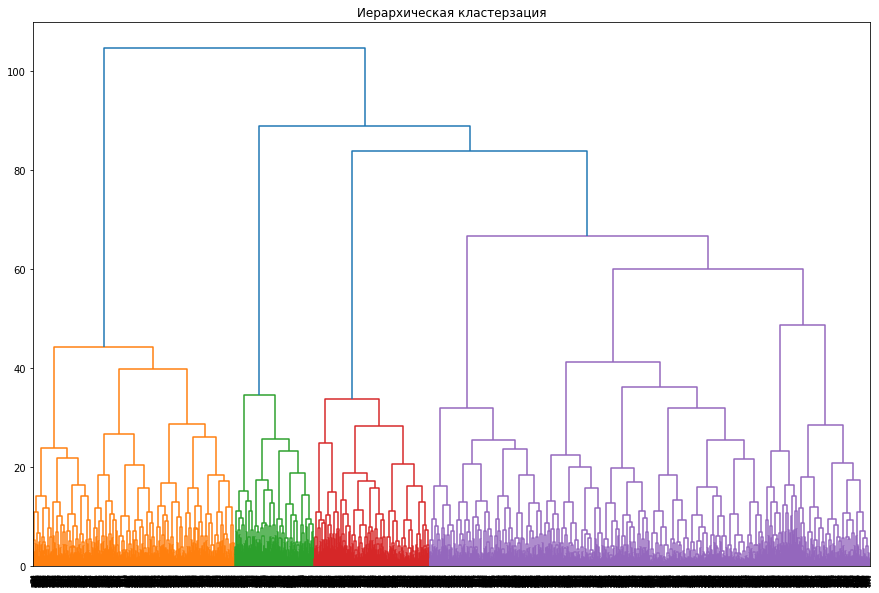

In [23]:
linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластерзация')
plt.show() 

**Вывод:**
<br>По дендрограмме можно выделить от 4 до 6 кластеров.

### Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов

In [24]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters = 5, random_state=0) 
# прогнозируем кластеры для наблюдений 
labels = km.fit_predict(x_sc)
gym_churn['cluster_km'] = labels

### Посмотрим на средние значения признаков для кластеров

In [25]:
gym_churn.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


**Выводы:**

**Кластер 0:**
* 96% живут или работают рядом с финес-центром
* Среди них больше всего клиентов, которые являются сотрудником компании-партнёра клуба (78%)
* Чаще остальных записались на занятие в рамках акции «приведи друга» (57%)
* Самая высокая длительность текущего абонемента (10.9 месяцев)
* Чаще остальных посещают групповые занятия (54%)
* Отток 3% - самый низкий

**Кластер 1:**
* 86% живут или работают рядом с финес-центром
* 47% являются сотрудником компании-партнёра клуба
* 30% записались на занятие в рамках акции «приведи друга»
* Никто из них не оставил номер телефона
* Длительность текущего абонемента сосавляет 4.8 месяца
* 43% посещают групповые занятия
* Отток составляет 27%

**Кластер 2:**
* Все живут или работают далеко от фитнес-центра
* 46% являются сотрудником компании-партнёра клуба
* Самый низкий % пришедших по промокоду «приведи друга» (8%)
* Длительность текущего абонемента составляет 2 месяца
* Меньше остальных посещают групповые занятия - 22%
* Отток составляет 44%

**Кластер 3:**
* 100% живут или работают рядом с финес-центром
* 35% являются сотрудником компании-партнёра клуба
* 24% записались на занятие в рамках акции «приведи друга»
* Самая короткая длительность текущего абонемента (1.9 месяцев)
* 34% посещают групповые занятия
* Самый короткий срок с первого обращения в фитнес-центр (2,4 месяца)
* Меньше остальных совершают доп. покупок
* Самая маленькая частота посещений в неделю (около 1 в неделю)
* Отток 51% - самый высокий

**Кластер 4:**
* 98% живут или работают рядом с финес-центром
* 36% являются сотрудником компании-партнёра клуба
* 23% записались на занятие в рамках акции «приведи друга»
* 47% посещают групповые занятия
* Самый высокий средний возраст - 30 лет
* Больше остальных совершают доп. покупок
* Длительность текущего абонемента составляет 2.5 месяца
* Самый долгий срок с первого обращения в фитнес-центр (4.9 месяца)
* Самая высокая частота посещений в неделю (2.9 в неделю)
* Отток составляет 7%

### Построим распределения признаков для кластеров

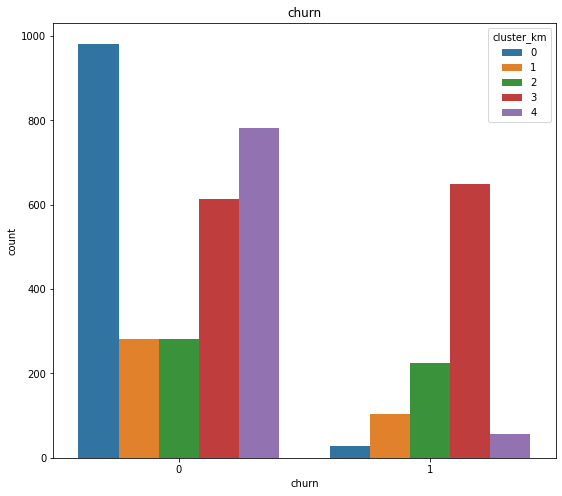

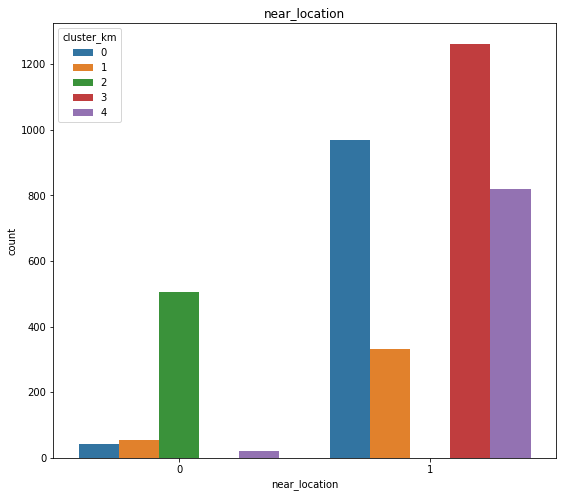

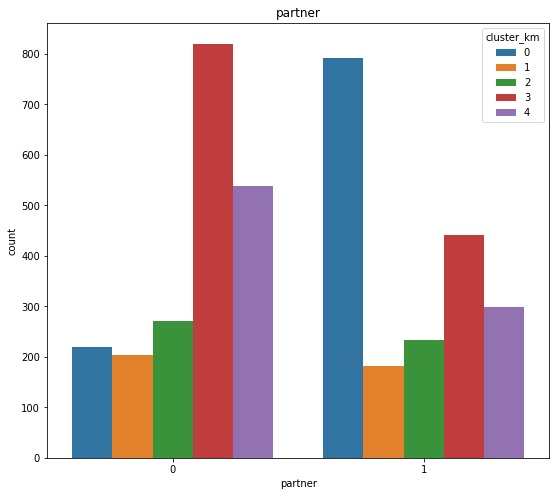

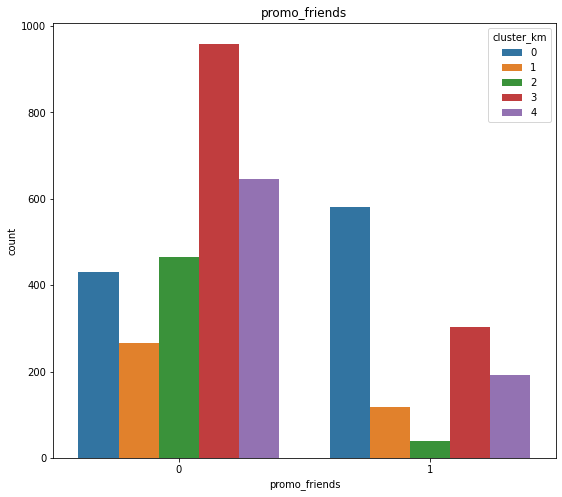

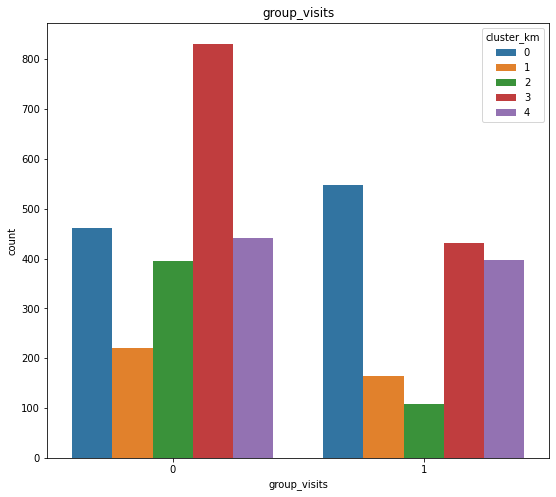

In [26]:
# построим распределения для категориальных признаков
cluster_categorical = ['churn', 'near_location', 'partner', 'promo_friends', 'group_visits']
for column in cluster_categorical:
    plt.figure(figsize=(9, 8))
    sns.countplot(x = gym_churn[column], hue='cluster_km', data=gym_churn)
    plt.title(column)
    plt.show()

**Выводы:**
* Больше половины 3 кластера попали в отток. Наименьшая доля оттока у 0 и 4 кластеров.
* Все представители 3 кластера живут или работают рядом с фитес-центром. Больший % 0, 1 и 4 кластеров живут или работают рядом с фитес-центром. Только 2 кластер живет/работает далеко от фитнес-центра.
* Большая часть 3 и 4 кластеров не является сотрудником компании-партнёра клуба. Большая часть 0 кластера является сотрудником компании-партнёра клуба. 1 и 2 кластеры примерно поровну.
* Большая часть 2, 3 и 4 кластеров не воспользовались акцией «приведи друга». Самый высокий процент воспользовавшихся акцией у 0 кластера.
* Большая часть 2 и 3 кластеров не посещают групповые зантия. Больше остальных посещает групповые занятия 0 кластер.

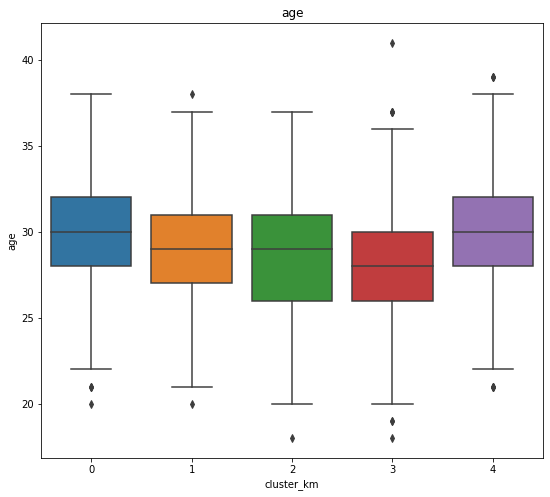

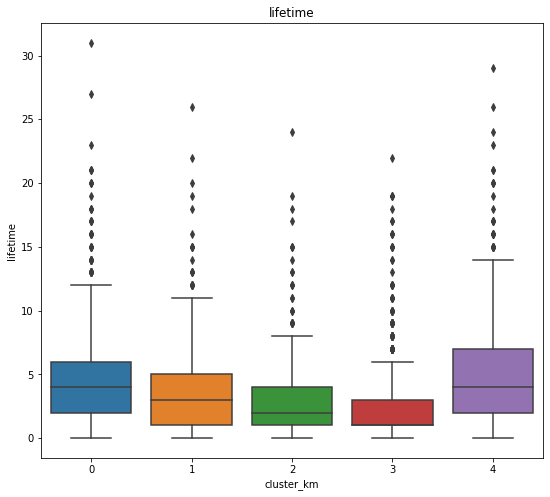

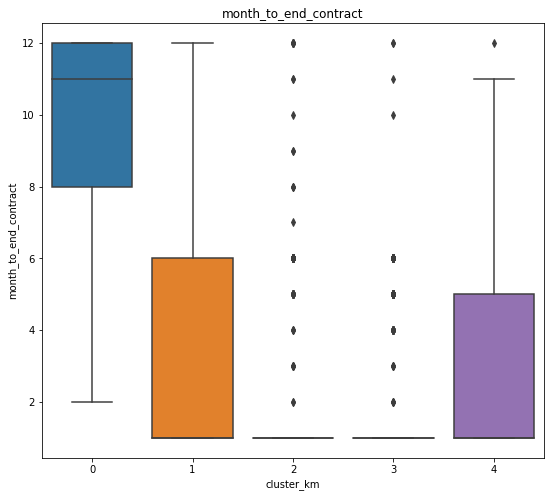

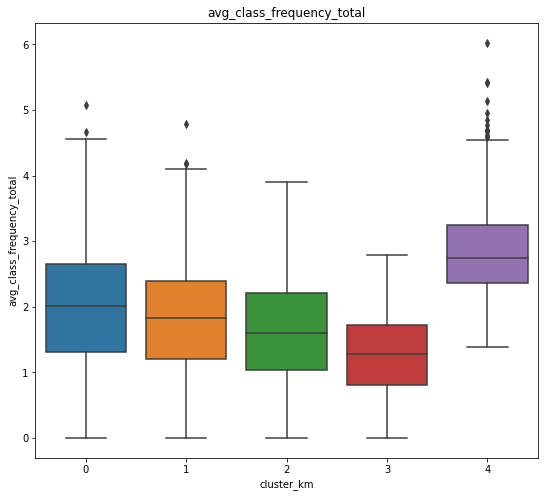

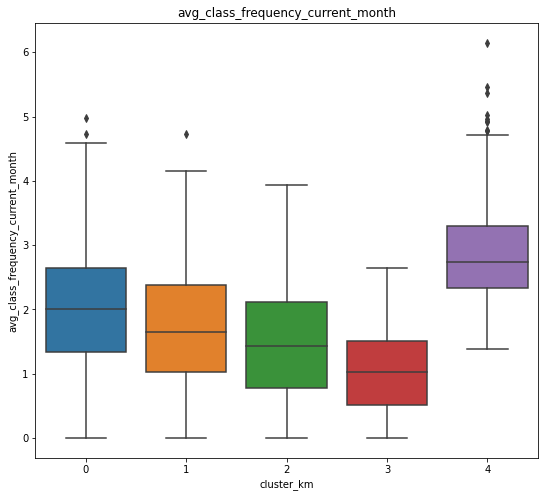

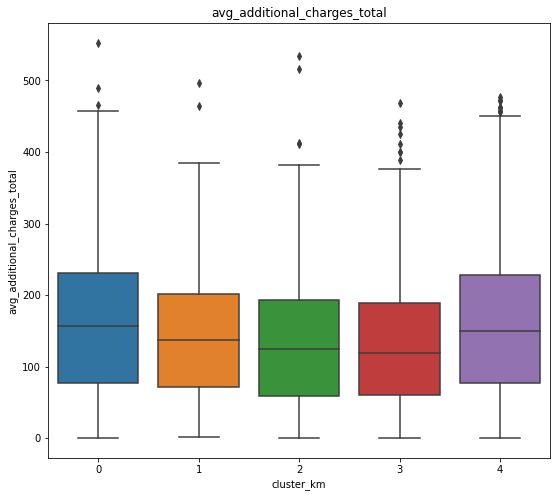

In [27]:
# построим распределения для количественных признаков
cluster_numeric = ['age', 'lifetime', 'month_to_end_contract', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'avg_additional_charges_total']
for column in cluster_numeric:
    plt.figure(figsize=(9, 8))
    sns.boxplot(x = 'cluster_km', y = gym_churn[column], data = gym_churn)
    plt.title(column)
    plt.show()

**Выводы:**
* Максимальный возраст у 4 кластера, минимальный - у 2 кластера.
* Самый высокий lifetime у 4 кластера, минимальный у 3 кластера.
* По параметру длительности контракта выделяется кластер 0 - большая часть подписала контракт на год.
* Самая высокая посещаемость фитнес-центра у кластера 4. Самая низкая - у 3 кластера.
* Больше других тратят на доп. услуги кластеры 0 и 4.

### Посчитаем долю оттока 

In [28]:
churn_share = gym_churn.query('churn==1').groupby('cluster_km')['churn'].count() / gym_churn.query('churn==1')['churn'].count()
churn_share

cluster_km
0    0.026390
1    0.097078
2    0.211122
3    0.611687
4    0.053723
Name: churn, dtype: float64

**Вывод:**
Самая высокая доля оттока у 3 кластера (61%), самая низкая у 0 кластера (2.6%)

## Выводы и рекомендации

После проведения анализа и подготовки данных мы разработали алгоритм для предсказывания оттока клиентов на уровне следующего месяца с полнотой 83%. 

**1. Выводы по имеющимся данным:**
* Пол представлен примерно поровну.
* Большая часть клиентов (85%) фитнес-центра живет рядом.
* Почти половина клиентов (48%) являются сотрудником компании-партнера фитнес-центра.
* 30% клиентов записались на первое занятие в рамках акции «приведи друга».
* Почти все клиенты оставили свой контактный телефон.
* Средний возраст клиентов - 29 лет. Максимальный - 41 год.
* Среднее время жизни клиента - 3.7 мес.
* Средний срок окончания действия текущего абонемента - 4.3 мес.
* 41% клиентов посещают групповые занятия.
* Средняя частота посещений за текущий месяц - 1.77 в неделю.
* Средняя суммарная выручка от других услуг фитнес-центра составляет 146.9 ед.
* Отток в текущем месяце составляет 26%.

**2. Ключевые факторы оттока**
* **Длительность абонемента** – клиенты с короткими абонементами (1.7 мес. vs. 5.7 мес.) чаще уходят.
* **Частота посещений** – уходящие клиенты посещают клуб реже (1 раз в неделю vs. 2 раза).
* **Групповые занятия** – клиенты, не посещающие групповые занятия, чаще уходят (41% vs. ниже у оттока).
* **Доп. услуги** – клиенты, тратящие меньше на доп. услуги, чаще уходят.
* **Акции и партнерства** – сотрудники компаний-партнеров и участники акции «приведи друга» реже уходят.

**Рекомендации:**

* Стимулировать переход на долгосрочные абонементы (скидки, бонусы).
* Повышать вовлеченность через групповые занятия (персональные рекомендации, бесплатные пробные занятия).
* Мониторить частоту посещений – клиенты, снижающие активность, в зоне риска (можно предлагать мотивационные программы).

**3. Анализ кластеров**
* **Кластер 0 (низкий отток 3%)** – лояльные клиенты (партнерские компании, акция «приведи друга», долгие абонементы).
    * **Стратегия:** Удерживать, поощрять рекомендации.
* **Кластер 1 (отток 27%)** – не оставляют телефон, средний абонемент.
    * **Стратегия:** Сбор контактов, улучшение коммуникации (email, push-уведомления).
* **Кластер 2 (высокий отток 44%)** – живут далеко, редко ходят на групповые занятия.
    * **Стратегия:** Предлагать онлайн-тренировки или транспортные льготы.
* **Кластер 3 (максимальный отток 51%)** – новички с низкой вовлеченностью.
    * **Стратегия:** Персональный коучинг, программы адаптации, пробные групповые занятия.
* **Кластер 4 (низкий отток 7%)** – активные клиенты с высокими тратами.
    * **Стратегия:** Программы лояльности, премиум-услуги.